In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv('churn.csv')
print(df.shape)
print(df.info())

(667, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-

In [3]:
print(df[df['Churn']=='True'].count())

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


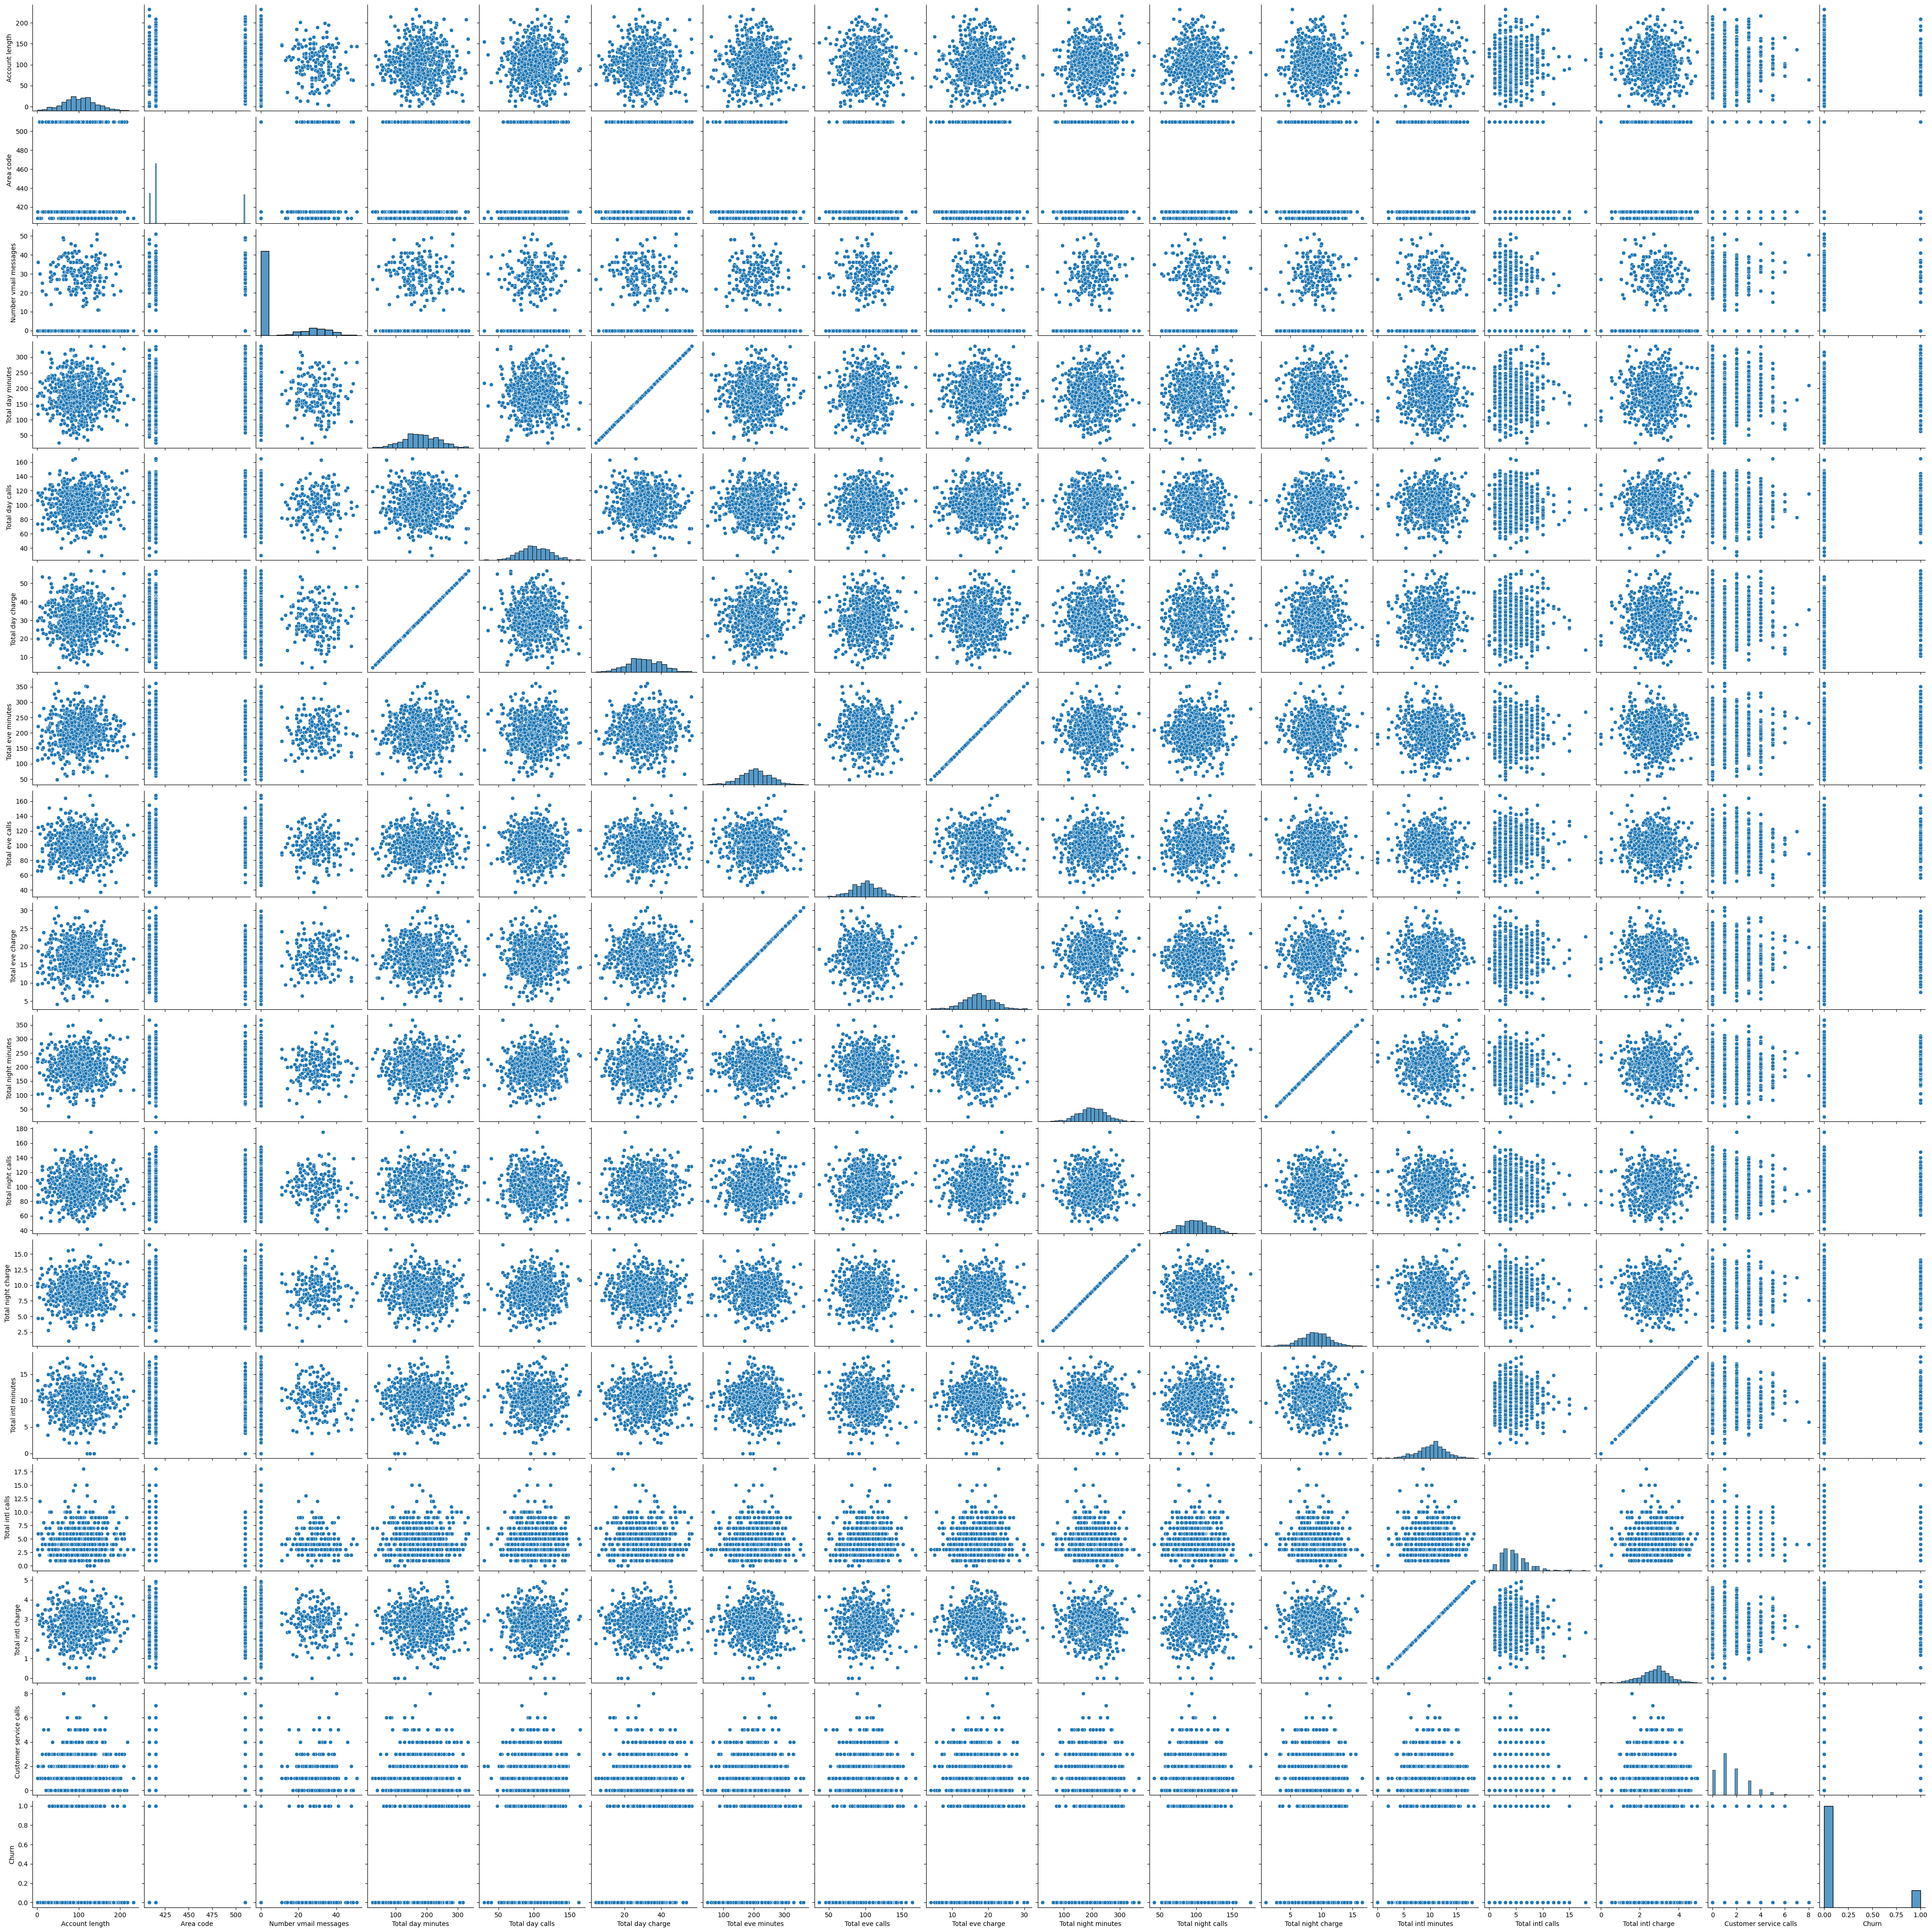

In [4]:
sb.pairplot(df)

C:\Users\abhis\AppData\Local\Temp\ipykernel_2044\2735957766.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1=df.corr()


                        Account length  Area code  Number vmail messages  \
Account length                1.000000  -0.026327              -0.011993   
Area code                    -0.026327   1.000000              -0.006907   
Number vmail messages        -0.011993  -0.006907               1.000000   
Total day minutes             0.017833   0.051507              -0.069172   
Total day calls               0.035703  -0.008972              -0.009952   
Total day charge              0.017839   0.051492              -0.069187   
Total eve minutes             0.027043   0.017160               0.040865   
Total eve calls               0.021237   0.017783              -0.051951   
Total eve charge              0.027051   0.017182               0.040876   
Total night minutes          -0.007527  -0.016832               0.039751   
Total night calls             0.027228   0.036421               0.003367   
Total night charge           -0.007528  -0.016818               0.039680   
Total intl m

<Axes: >

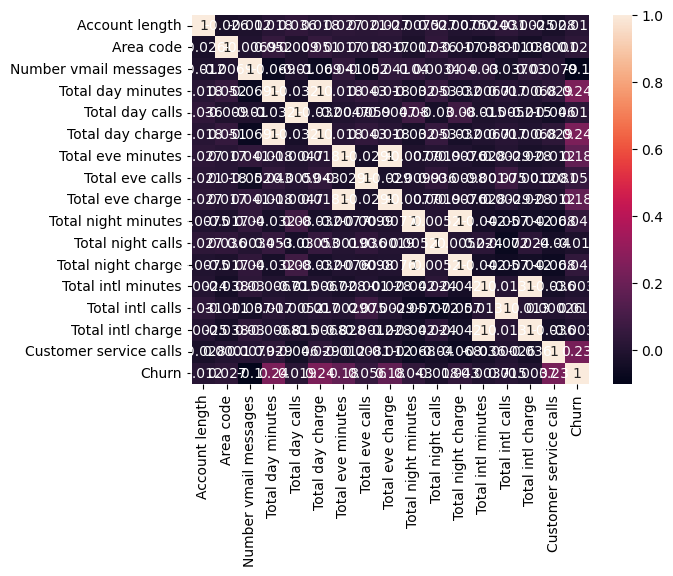

In [5]:
df1=df.corr()
print(df1)
sb.heatmap(df1,annot=True)

In [6]:
df.drop(columns=['Account length'],inplace=True)
df.head()

State  Area code International plan Voice mail plan  Number vmail messages  \
0    LA        408                 No              No                      0   
1    IN        415                 No              No                      0   
2    NY        415                 No              No                      0   
3    SC        415                 No              No                      0   
4    HI        510                 No              No                      0   

   Total day minutes  Total day calls  Total day charge  Total eve minutes  \
0              184.5               97             31.37              351.6   
1              129.1              137             21.95              228.5   
2              332.9               67             56.59              317.8   
3              110.4              103             18.77              137.3   
4              119.3              117             20.28              215.1   

   Total eve calls  Total eve charge  Total night minutes  Total night calls  \
0               80             29.89                215.8                 90   
1               83             19.42                208.8                111   
2               97             27.01                160.6                128   
3              102             11.67                189.6                105   
4              109             18.28                178.7                 90   

   Total night charge  Total intl minutes  Total intl calls  \
0                9.71                 8.7                 4   
1                9.40                12.7                 6   
2                7.23                 5.4                 9   
3                8.53                 7.7                 6   
4                8.04                11.1                 1   

   Total intl charge  Customer service calls  Churn  
0               2.35                       1  False  
1               3.43                       4   True  
2               1.46                       4   True  
3               2.08                       2  False  
4               3.00                       1  False

In [7]:
df.isnull().sum()

State                     0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

#### Input & Output Splitting

In [28]:
from sklearn import linear_model
regress=linear_model.LogisticRegression()
df2=df.values
#print(df2)
train_x=(df2[:,5:17])
train_y=df2[:,16]
print(train_x.shape)
print(train_y.shape)

(667, 12)
(667,)


#### MinMax Normalization

In [29]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
train_x=ms.fit_transform(train_x)
print(train_x)

[[0.51426719 0.4962963  0.51440015 ... 0.47540984 0.22222222 0.4757085 ]
 [0.33463035 0.79259259 0.33473202 ... 0.69398907 0.33333333 0.69433198]
 [0.99546044 0.27407407 0.99542247 ... 0.29508197 0.5        0.29554656]
 ...
 [0.54474708 0.65185185 0.5447263  ... 0.72131148 0.44444444 0.72064777]
 [0.46660182 0.62222222 0.46671753 ... 0.63387978 0.22222222 0.63360324]
 [0.60927367 0.55555556 0.60938394 ... 0.27322404 0.55555556 0.27327935]]


In [30]:
regress.fit(train_x,train_y)
#The coefficents y=m0x0+m1x1+...+m11x11+c
print('Coefficients:',regress.coef_)
print('Intercept:',regress.intercept_)

ValueError: Unknown label type: 'unknown'

In [21]:

import numpy as np
from sklearn                        import metrics, svm
from sklearn.linear_model           import LogisticRegression
from sklearn import preprocessing
from sklearn import utils
training_data_X    = np.array([ [1.2, 6.7, 2.7],  [2.3, 4.6, 2.2],  [0.3, 3.9, 0.8],  [2.1, 1.3, 4.3]  ])
training_scores_Y  = np.array( [1.4, 9.2, 2.5, 2.2] )
prediction_data_test  = np.array([ [1.5, 3.4, 2.2],  [7.6, 7.2, 0.2] ])
#clf = LogisticRegression()
#clf.fit(training_data_X, training_scores_Y)
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(training_scores_Y)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(training_scores_Y))
print(utils.multiclass.type_of_target(training_scores_Y.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))
clf = LogisticRegression()
clf.fit(training_data_X, training_scores_encoded)
print("LogisticRegression")
print(clf.predict(prediction_data_test))

[0 3 2 1]
continuous
multiclass
multiclass
LogisticRegression
[3 3]


# Prediction

In [22]:
y_predicted=regress.predict(train_x)
for i in range(0,len(train_x)):
    print(train_y[i],y_predicted[i])
df['Pred']=y_predicted
df

AttributeError: 'LogisticRegression' object has no attribute 'coef_'